# MNIST

## Loading the dataset

In [1]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [2]:
X_train.shape

(60000, 28, 28)

In [3]:
y_train.shape

(60000,)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
y_test.shape

(10000,)

## Visualizing Digits

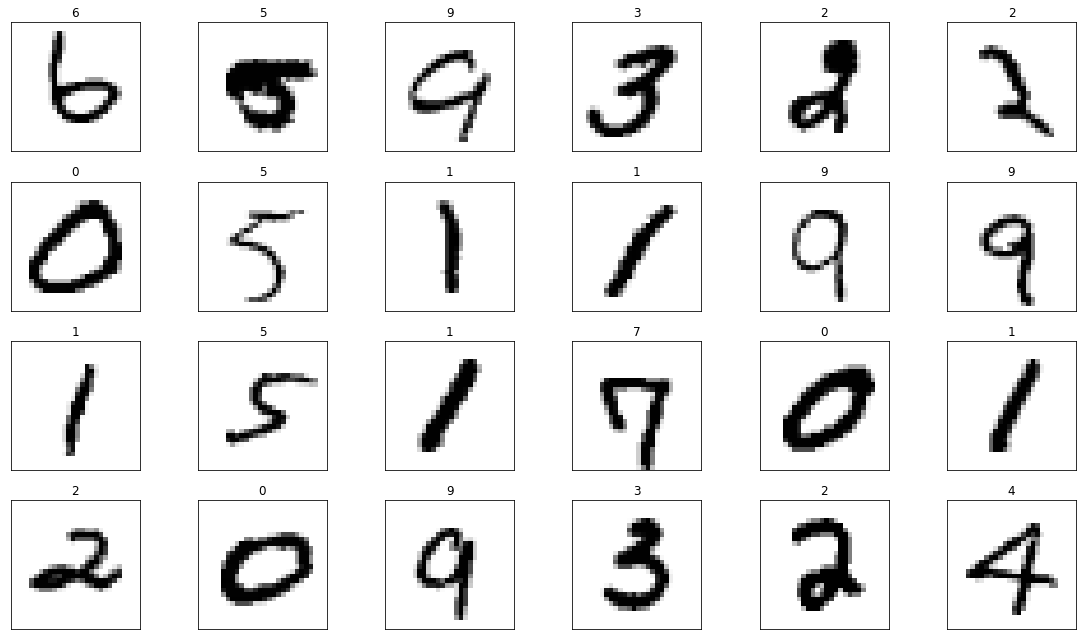

In [6]:
import matplotlib.pyplot as plt
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))
for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(target)
plt.tight_layout()

## Reshaping the Image Data

In [7]:
X_train = X_train.reshape((60000, 28, 28, 1))
X_train.shape

(60000, 28, 28, 1)

In [8]:
X_test = X_test.reshape((10000, 28, 28, 1))
X_test.shape

(10000, 28, 28, 1)

## Normalizing the Image Data

In [9]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

## Convert Labels to Categorical Data

In [10]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_train.shape

(60000, 10)

In [11]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [12]:
y_test = to_categorical(y_test)
y_test.shape

(10000, 10)

## Creating the Neural Network

In [13]:
from tensorflow.keras.models import Sequential
cnn = Sequential()

## Adding Layers to the Network

In [14]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dense(units=10, activation='softmax'))

## Printing the Model’s Summary

In [15]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 128)               4

## Visualizing a Model’s Structure

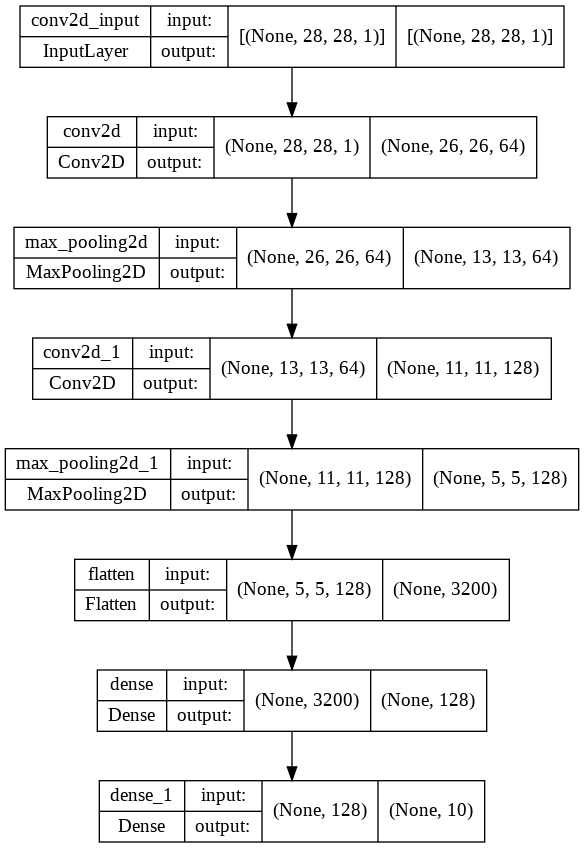

In [16]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True, show_layer_names=True)
Image(filename='convnet.png')

## Compiling the Model

In [17]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Training the Model

In [18]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 [==============================] - 7s 5ms/step - loss: 0.1438 - accuracy: 0.9562 - val_loss: 0.0498 - val_accuracy: 0.9857
Epoch 2/5
844/844 [==============================] - 4s 5ms/step - loss: 0.0424 - accuracy: 0.9867 - val_loss: 0.0467 - val_accuracy: 0.9878
Epoch 3/5
844/844 [==============================] - 4s 5ms/step - loss: 0.0277 - accuracy: 0.9908 - val_loss: 0.0343 - val_accuracy: 0.9907
Epoch 4/5
844/844 [==============================] - 4s 5ms/step - loss: 0.0192 - accuracy: 0.9941 - val_loss: 0.0346 - val_accuracy: 0.9910
Epoch 5/5
844/844 [==============================] - 4s 5ms/step - loss: 0.0153 - accuracy: 0.9948 - val_loss: 0.0378 - val_accuracy: 0.9902


## Evaluating the Model

In [19]:
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0342 - accuracy: 0.9906


In [20]:
loss

0.03415953367948532

In [21]:
accuracy

0.9905999898910522

In [22]:
predictions = cnn.predict(X_test)
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')

0: 0.0000000012%
1: 0.0000000381%
2: 0.0000026420%
3: 0.0000000152%
4: 0.0000000001%
5: 0.0000000001%
6: 0.0000000000%
7: 100.0000000000%
8: 0.0000000008%
9: 0.0000005581%


## Locating the Incorrect Predictions

In [23]:
images = X_test.reshape((10000, 28, 28))
incorrect_predictions = []
for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)
    if predicted != expected:
        incorrect_predictions.append(
            (i, images[i], predicted, expected))
len(incorrect_predictions)

94

## Visualizing Incorrect Predictions

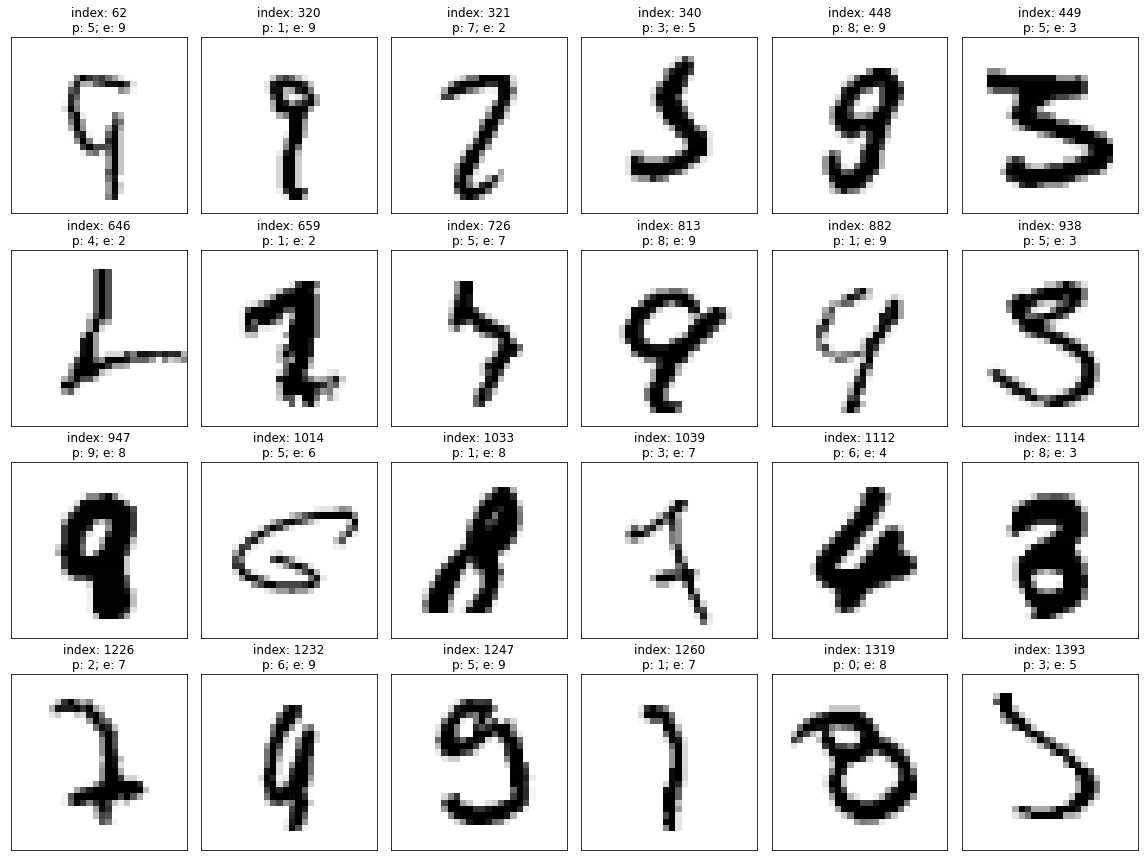

In [24]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))
for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

## Displaying the Probabilities for Several Incorrect Predictions

In [25]:
def display_probabilities(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability:.10%}')

In [26]:
display_probabilities(predictions[340])

0: 0.0000000307%
1: 0.0001686311%
2: 0.0000020343%
3: 99.6887743473%
4: 0.0000037764%
5: 0.3108687000%
6: 0.0000673341%
7: 0.0000000030%
8: 0.0001102115%
9: 0.0000047555%


In [27]:
display_probabilities(predictions[740])

0: 0.0000058501%
1: 0.3254331183%
2: 0.0229354991%
3: 0.0008115830%
4: 77.8846025467%
5: 0.0010004686%
6: 0.0000004595%
7: 0.0024467843%
8: 0.0445659505%
9: 21.7181876302%


In [28]:
display_probabilities(predictions[1260])

0: 0.0016462167%
1: 91.2217915058%
2: 0.0738591421%
3: 0.0027464393%
4: 0.0008415257%
5: 0.0001391360%
6: 0.0000035565%
7: 8.6932234466%
8: 0.0044663670%
9: 0.0012878345%


## Saving a Model

In [29]:
cnn.save('mnist_cnn.h5')

# Fashion-MNIST

## Loading the dataset

In [30]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [31]:
X_train.shape

(60000, 28, 28)

In [32]:
y_train.shape

(60000,)

In [33]:
X_test.shape

(10000, 28, 28)

In [34]:
y_test.shape

(10000,)

## Visualizing Digits

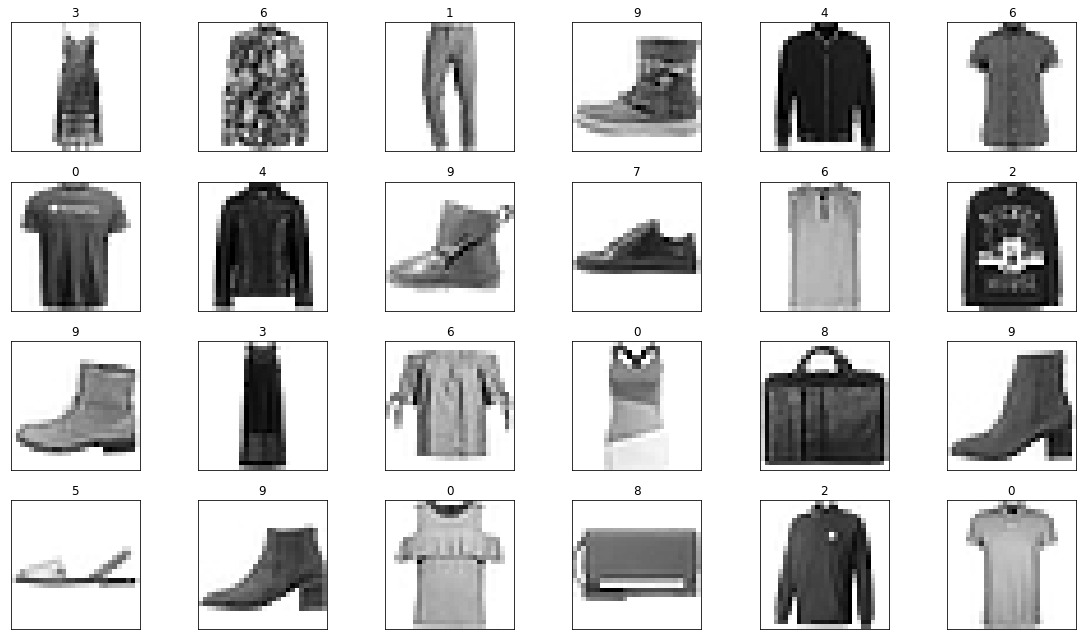

In [35]:
import matplotlib.pyplot as plt
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))
for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(target)
plt.tight_layout()

## Reshaping the Image Data

In [36]:
X_train = X_train.reshape((60000, 28, 28, 1))
X_train.shape

(60000, 28, 28, 1)

In [37]:
X_test = X_test.reshape((10000, 28, 28, 1))
X_test.shape

(10000, 28, 28, 1)

## Normalizing the Image Data

In [38]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

## Convert Labels to Categorical Data

In [39]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_train.shape

(60000, 10)

In [40]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [41]:
y_test = to_categorical(y_test)
y_test.shape

(10000, 10)

## Creating the Neural Network

In [42]:
from tensorflow.keras.models import Sequential
cnn = Sequential()

## Adding Layers to the Network

In [43]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dense(units=10, activation='softmax'))

## Printing the Model’s Summary

In [44]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3200)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

## Visualizing a Model’s Structure

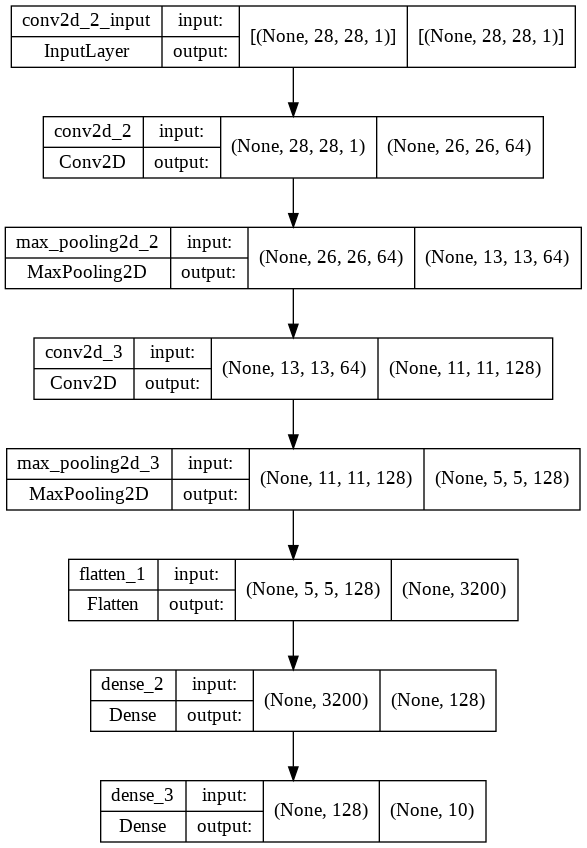

In [45]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True, show_layer_names=True)
Image(filename='convnet.png')

## Compiling the Model

In [46]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Training the Model

In [47]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 [==============================] - 5s 5ms/step - loss: 0.4734 - accuracy: 0.8290 - val_loss: 0.3299 - val_accuracy: 0.8813
Epoch 2/5
844/844 [==============================] - 4s 5ms/step - loss: 0.3112 - accuracy: 0.8864 - val_loss: 0.2820 - val_accuracy: 0.8960
Epoch 3/5
844/844 [==============================] - 4s 5ms/step - loss: 0.2598 - accuracy: 0.9038 - val_loss: 0.2581 - val_accuracy: 0.9065
Epoch 4/5
844/844 [==============================] - 4s 5ms/step - loss: 0.2293 - accuracy: 0.9146 - val_loss: 0.2600 - val_accuracy: 0.9045
Epoch 5/5
844/844 [==============================] - 4s 5ms/step - loss: 0.1996 - accuracy: 0.9269 - val_loss: 0.2413 - val_accuracy: 0.9108


## Evaluating the Model

In [48]:
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2676 - accuracy: 0.9019


In [49]:
loss

0.26756006479263306

In [50]:
accuracy

0.9018999934196472

In [51]:
predictions = cnn.predict(X_test)
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')

0: 0.0000058339%
1: 0.0000007977%
2: 0.0000037030%
3: 0.0000010050%
4: 0.0000374385%
5: 0.0031586540%
6: 0.0000090431%
7: 0.0139921322%
8: 0.0000256137%
9: 99.9827623367%


## Locating the Incorrect Predictions

In [52]:
images = X_test.reshape((10000, 28, 28))
incorrect_predictions = []
for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)
    if predicted != expected:
        incorrect_predictions.append(
            (i, images[i], predicted, expected))
len(incorrect_predictions)

981

## Visualizing Incorrect Predictions

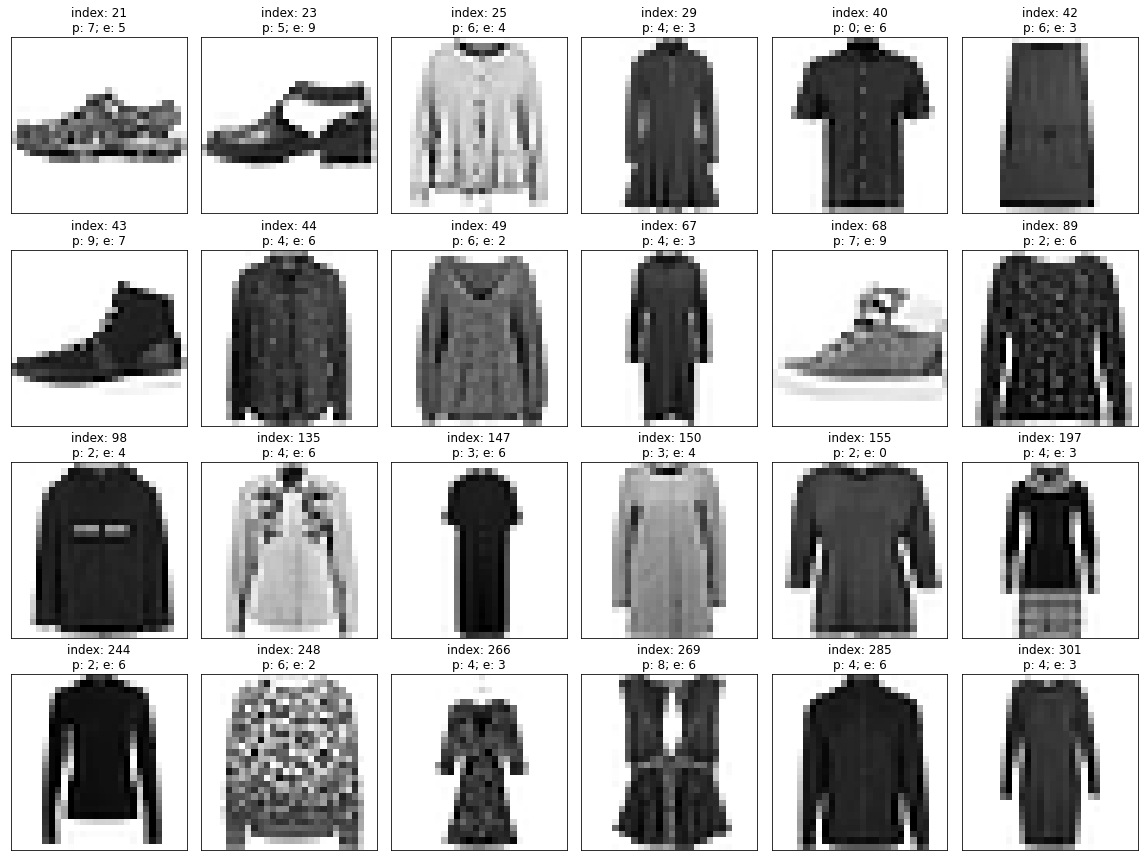

In [53]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))
for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

## Displaying the Probabilities for Several Incorrect Predictions

In [54]:
def display_probabilities(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability:.10%}')

In [55]:
display_probabilities(predictions[340])

0: 0.0042299391%
1: 0.0032928729%
2: 2.5367707014%
3: 0.0015720711%
4: 97.3644912243%
5: 0.0003176384%
6: 0.0780282717%
7: 0.0003387421%
8: 0.0075996504%
9: 0.0033725850%


In [56]:
display_probabilities(predictions[740])

0: 0.0629225862%
1: 0.0102748236%
2: 0.0389262772%
3: 99.0741491318%
4: 0.2871769015%
5: 0.0033103966%
6: 0.4410040099%
7: 0.0146629172%
8: 0.0408384920%
9: 0.0267282390%


In [57]:
display_probabilities(predictions[1260])

0: 98.9398837090%
1: 0.0000621729%
2: 0.0112643640%
3: 0.0036513298%
4: 0.0001413074%
5: 0.0000254426%
6: 1.0449048132%
7: 0.0000001686%
8: 0.0000348752%
9: 0.0000314310%


## Saving a Model

In [58]:
cnn.save('fashion_mnist_cnn.h5')

# Remove the first Dense layer

## Creating the Neural Network

In [59]:
from tensorflow.keras.models import Sequential
cnn = Sequential()

## Adding Layers to the Network

In [60]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(units=10, activation='softmax'))

## Printing the Model’s Summary

In [61]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 3200)              0         
                                                                 
 dense_4 (Dense)             (None, 10)               

## Visualizing a Model’s Structure

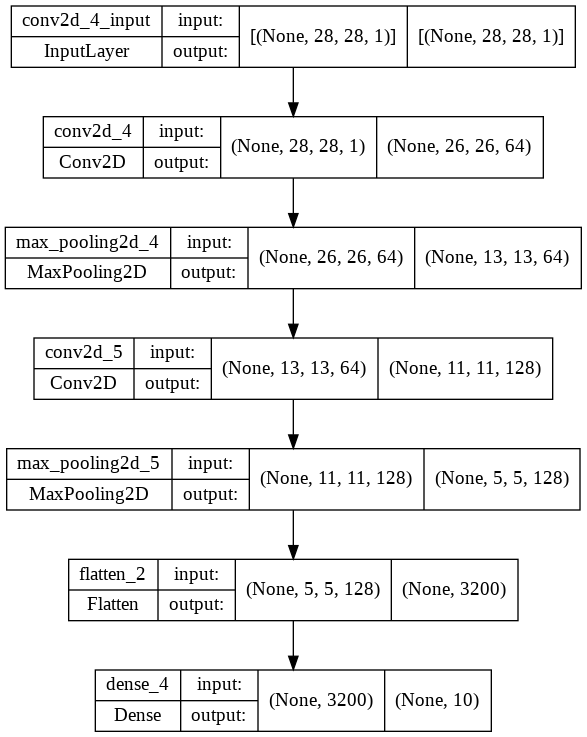

In [62]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True, show_layer_names=True)
Image(filename='convnet.png')

## Compiling the Model

In [63]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Training the Model

In [64]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 [==============================] - 5s 5ms/step - loss: 0.4940 - accuracy: 0.8232 - val_loss: 0.4147 - val_accuracy: 0.8412
Epoch 2/5
844/844 [==============================] - 4s 5ms/step - loss: 0.3315 - accuracy: 0.8816 - val_loss: 0.3302 - val_accuracy: 0.8765
Epoch 3/5
844/844 [==============================] - 4s 5ms/step - loss: 0.2875 - accuracy: 0.8970 - val_loss: 0.2806 - val_accuracy: 0.8962
Epoch 4/5
844/844 [==============================] - 4s 5ms/step - loss: 0.2573 - accuracy: 0.9074 - val_loss: 0.2684 - val_accuracy: 0.9022
Epoch 5/5
844/844 [==============================] - 4s 5ms/step - loss: 0.2352 - accuracy: 0.9151 - val_loss: 0.2616 - val_accuracy: 0.9047


## Evaluating the Model

In [65]:
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2786 - accuracy: 0.8974


In [66]:
loss

0.27855706214904785

In [67]:
accuracy

0.8974000215530396

In [68]:
predictions = cnn.predict(X_test)
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')

0: 0.0000290761%
1: 0.0000000186%
2: 0.0000011463%
3: 0.0000009483%
4: 0.0000078388%
5: 0.1608885592%
6: 0.0000222120%
7: 0.1517194207%
8: 0.0216208893%
9: 99.6657013893%


## Locating the Incorrect Predictions

In [69]:
images = X_test.reshape((10000, 28, 28))
incorrect_predictions = []
for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)
    if predicted != expected:
        incorrect_predictions.append(
            (i, images[i], predicted, expected))
len(incorrect_predictions)

1026

## Visualizing Incorrect Predictions

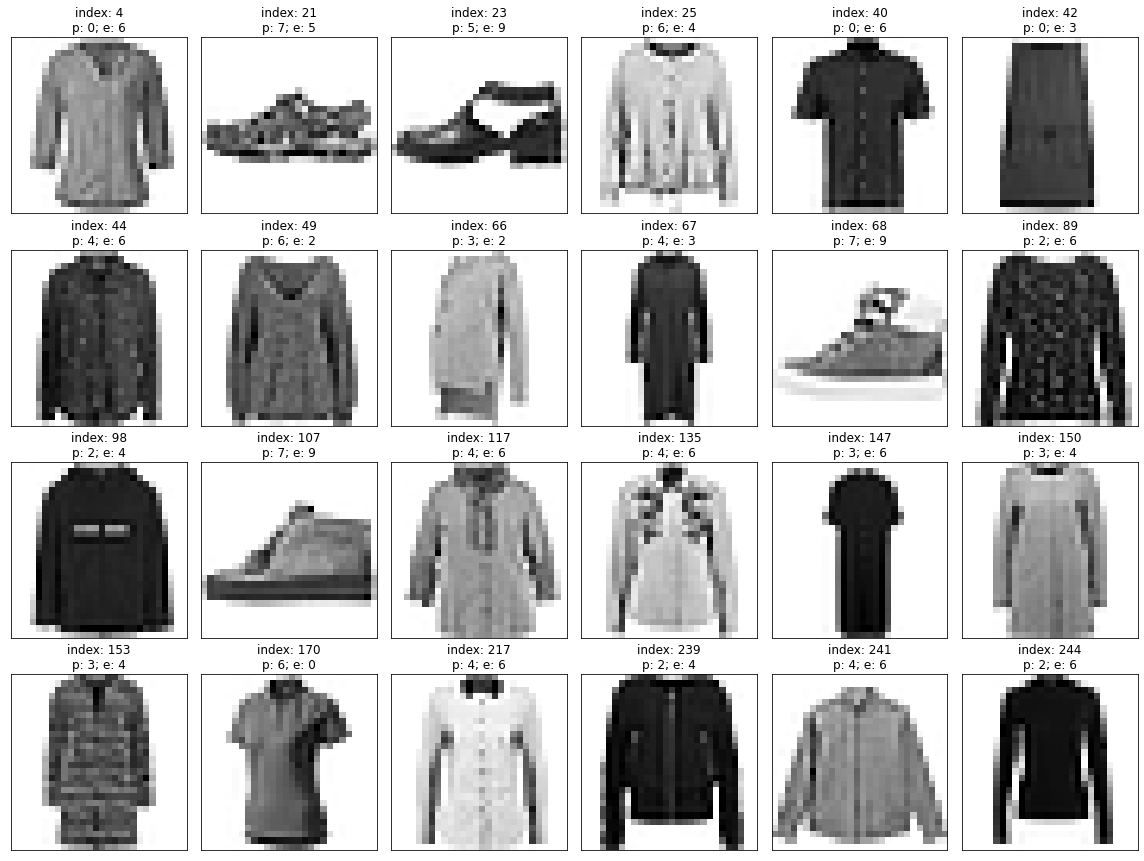

In [70]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))
for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

## Displaying the Probabilities for Several Incorrect Predictions

In [71]:
def display_probabilities(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability:.10%}')

In [72]:
display_probabilities(predictions[340])

0: 0.0460227078%
1: 0.0025694620%
2: 2.3028993979%
3: 0.0280054141%
4: 96.0380077362%
5: 0.0000028642%
6: 1.0214275680%
7: 0.0000006239%
8: 0.5610620137%
9: 0.0000125593%


In [73]:
display_probabilities(predictions[740])

0: 0.0351397699%
1: 0.0054663498%
2: 0.0143725236%
3: 98.8071084023%
4: 0.8287630044%
5: 0.0001679098%
6: 0.2678985475%
7: 0.0066407221%
8: 0.0338521320%
9: 0.0005960700%


In [74]:
display_probabilities(predictions[1260])

0: 98.9953637123%
1: 0.0000253676%
2: 0.0228871111%
3: 0.0346301473%
4: 0.0000823791%
5: 0.0000000040%
6: 0.9468679316%
7: 0.0000000001%
8: 0.0001387938%
9: 0.0000000032%


## Saving a Model

In [75]:
cnn.save('fashion_mnist_cnn_2.h5')

# Add a layer

## Creating the Neural Network

In [76]:
from tensorflow.keras.models import Sequential
cnn = Sequential()

## Adding Layers to the Network

In [77]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(units=4096, activation='relu'))
cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dense(units=10, activation='softmax'))

## Printing the Model’s Summary

In [78]:
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 3200)              0         
                                                                 
 dense_5 (Dense)             (None, 4096)             

## Visualizing a Model’s Structure

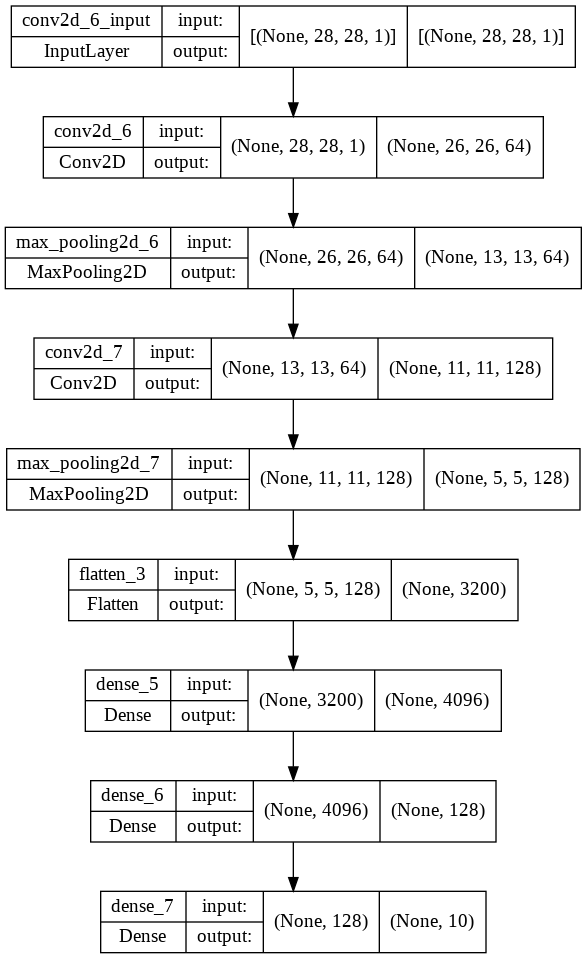

In [79]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True, show_layer_names=True)
Image(filename='convnet.png')

## Compiling the Model

In [80]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Training the Model

In [81]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 [==============================] - 8s 9ms/step - loss: 0.4250 - accuracy: 0.8456 - val_loss: 0.3398 - val_accuracy: 0.8703
Epoch 2/5
844/844 [==============================] - 7s 8ms/step - loss: 0.2711 - accuracy: 0.8991 - val_loss: 0.2702 - val_accuracy: 0.9027
Epoch 3/5
844/844 [==============================] - 7s 8ms/step - loss: 0.2254 - accuracy: 0.9148 - val_loss: 0.2840 - val_accuracy: 0.8888
Epoch 4/5
844/844 [==============================] - 7s 8ms/step - loss: 0.1863 - accuracy: 0.9299 - val_loss: 0.2433 - val_accuracy: 0.9108
Epoch 5/5
844/844 [==============================] - 7s 8ms/step - loss: 0.1547 - accuracy: 0.9412 - val_loss: 0.2525 - val_accuracy: 0.9177


## Evaluating the Model

In [82]:
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2680 - accuracy: 0.9136


In [83]:
loss

0.26796844601631165

In [84]:
accuracy

0.9136000275611877

In [85]:
predictions = cnn.predict(X_test)
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')

0: 0.0000000097%
1: 0.0000000162%
2: 0.0000000069%
3: 0.0000000038%
4: 0.0000000002%
5: 0.0001271807%
6: 0.0000000449%
7: 0.0001391540%
8: 0.0000000108%
9: 99.9997377396%


## Locating the Incorrect Predictions

In [86]:
images = X_test.reshape((10000, 28, 28))
incorrect_predictions = []
for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)
    if predicted != expected:
        incorrect_predictions.append(
            (i, images[i], predicted, expected))
len(incorrect_predictions)

864

## Visualizing Incorrect Predictions

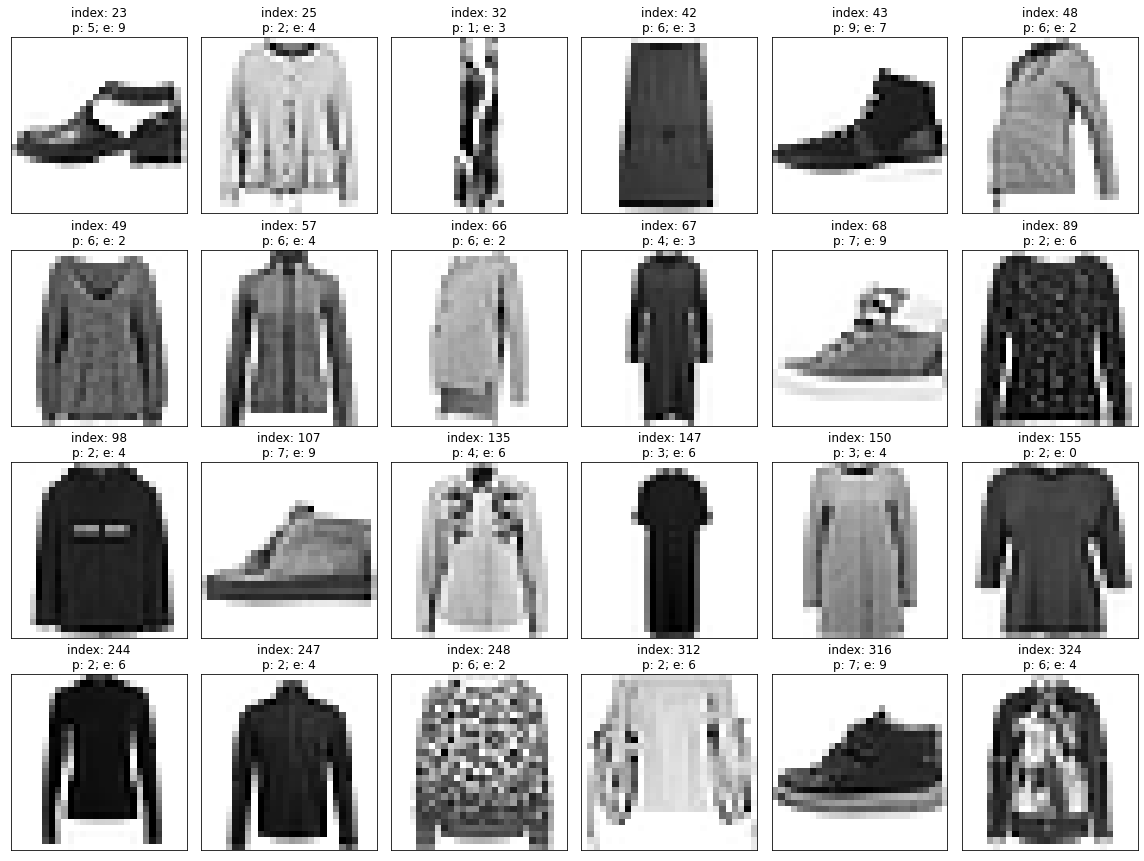

In [87]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))
for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

## Displaying the Probabilities for Several Incorrect Predictions

In [88]:
def display_probabilities(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability:.10%}')

In [89]:
display_probabilities(predictions[340])

0: 0.0148468927%
1: 0.0025488464%
2: 2.0652756095%
3: 0.0002742045%
4: 97.0562517643%
5: 0.0010213919%
6: 0.8365551010%
7: 0.0003164450%
8: 0.0216886547%
9: 0.0012203795%


In [90]:
display_probabilities(predictions[740])

0: 0.0096889416%
1: 0.0023129054%
2: 0.0016205040%
3: 99.8225152493%
4: 0.0077035475%
5: 0.0000005673%
6: 0.1558986260%
7: 0.0000005816%
8: 0.0002547348%
9: 0.0000105671%


In [91]:
display_probabilities(predictions[1260])

0: 99.5064318180%
1: 0.0000721669%
2: 0.0050554423%
3: 0.0028464812%
4: 0.0001300617%
5: 0.0000064746%
6: 0.4853708670%
7: 0.0000004455%
8: 0.0000967636%
9: 0.0000010364%


## Saving a Model

In [92]:
cnn.save('fashion_mnist_cnn_3.h5')